In [111]:
import numpy as np
import networkx as nx
import pylab as plt
from scipy.stats import norm,uniform,binom,poisson
import random

In [2]:
def float_range(stop, start=0, step=1):
    while start < stop:
        yield float(start)
        start += step 

In [171]:
class Vertex:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    def __str__(self):
        return f"({self.x:.2f}, {self.y:.2f})"
    
    def __add__(self, other):
        return Vertex(self.x + other.x, self.y + other.y)
    
    def __sub__(self, other):
        return Vertex(self.x - other.x, self.y - other.y)
    
    def __eq__(self, __o: object) -> bool:
        return self.x == __o.x and self.y == __o.y
    
    def __abs__(self):
        return (self.x ** 2 + self.y ** 2) ** 0.5
    
    def __repr__(self):
        return f"vertex({self.x:.2f}, {self.y:.2f})"
    
    def __hash__(self):
        return hash((self.x, self.y))
    
    def __iter__(self):
        return iter((self.x, self.y))
    
    def __getitem__(self, index):
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        else:
            raise IndexError("Index out of range")
        
        
    #############################################
    #############################################    
    #############################################
    # Properties
    #############################################
    #############################################
    #############################################
    
    @property
    def x(self):
        return self.__x
    @x.setter
    def x(self, value):
        if not isinstance(value, (int, float)):
            raise TypeError("x must be a number")
        self.__x = float(value)
        
    @property
    def y(self):
        return self.__y
    @y.setter
    def y(self, value):
        if not isinstance(value, (int, float)):
            raise TypeError("y must be a number")
        self.__y = float(value)
        
    @property
    def tuple(self):
        return (self.x, self.y)
    @tuple.setter
    def tuple(self, value):
        if not isinstance(value, tuple):
            raise TypeError("tuple must be a tuple")
        if len(value) != 2:
            raise ValueError("tuple must be a tuple of length 2")
        self.x = value[0]
        self.y = value[1]
    
    @property
    def list(self):
        return [self.x, self.y]
    @list.setter
    def list(self, value):
        if not isinstance(value, list):
            raise TypeError("list must be a list")
        if len(value) != 2:
            raise ValueError("list must be a list of length 2")
        self.x = value[0]
        self.y = value[1]


    
    @classmethod
    def from_tuple(cls, vertex):
        return cls(vertex[0], vertex[1])
    
    #############################################
    # Distance methods
    #############################################
    
    @staticmethod
    def distance(p1, p2):
        return ((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2) ** 0.5
    
    @staticmethod
    def midpoint(p1, p2):
        return Vertex((p1.x + p2.x) / 2, (p1.y + p2.y) / 2)

    @staticmethod
    def closest_point(p, *points):
        if len(points) == 0:
            return None
        
        closest = points[0]
        for point in points:
            if Vertex.distance(p, point) < Vertex.distance(p, closest):
                closest = point
        return closest
    
    @staticmethod
    def farthest_point(p, *points):
        if len(points) == 0:
            return None
        
        farthest = points[0]
        for point in points:
            if Vertex.distance(p, point) > Vertex.distance(p, farthest):
                farthest = point
        return farthest
    
    @staticmethod
    def closest_points_in_order(p, *points):
        if len(points) == 0:
            return None
        
        points = list(points)
        points.sort(key=lambda point: Vertex.distance(p, point))
        return points
    
    #############################################
    # Line methods
    #############################################
    
    @staticmethod
    def slope(p1, p2):
        if p2.x - p1.x == 0:
            return np.inf
        return (p2.y - p1.y) / (p2.x - p1.x)
    
    @staticmethod
    def intercept(p1, p2):
        if p2.x - p1.x == 0:
            return np.nan
        return p1.y - Vertex.slope(p1, p2) * p1.x
    
    @staticmethod
    def equation(p1, p2):
        if p2.x - p1.x == 0:
            return f"x = {p1.x}"
        return f"y = {Vertex.slope(p1, p2)}x + {Vertex.intercept(p1, p2)}"
    
    
    @staticmethod
    def is_parallel(p1, p2, p3, p4):
        return Vertex.slope(p1, p2) == Vertex.slope(p3, p4)
    
    @staticmethod
    def is_perpendicular(p1, p2, p3, p4):
        return Vertex.slope(p1, p2) * Vertex.slope(p3, p4) == -1

    @staticmethod
    def intersection(p1, p2, p3, p4):
        slope1 = Vertex.slope(p1, p2)
        slope2 = Vertex.slope(p3, p4)
        intercept1 = Vertex.intercept(p1, p2)
        intercept2 = Vertex.intercept(p3, p4)
        
        if slope1 == slope2:
            return None
        
        if slope1 == np.inf:
            x = p1.x
            y = slope2 * x + intercept2
        elif slope2 == np.inf:
            x = p3.x
            y = slope1 * x + intercept1
        else:
            x = (intercept2 - intercept1) / (slope1 - slope2)
            y = slope1 * x + intercept1
        return Vertex(x, y)
    
    @staticmethod
    def is_collinear(p1, p2, p3):
        return Vertex.is_parallel(p1, p2, p2, p3)
    
    #############################################
    # Polygon methods
    #############################################
    
    @staticmethod
    def area(p1, p2, p3):
        return abs((p1.x * (p2.y - p3.y) + p2.x * (p3.y - p1.y) + p3.x * (p1.y - p2.y)) / 2)
    
    @staticmethod
    def is_point_inside_triangle(p, p1, p2, p3):
        A = Vertex.area(p1, p2, p3)
        A1 = Vertex.area(p, p2, p3)
        A2 = Vertex.area(p1, p, p3)
        A3 = Vertex.area(p1, p2, p)
        return A == A1 + A2
    
    @staticmethod
    def is_point_inside_rectangle(p, p1, p2, p3, p4):
        return Vertex.is_point_inside_triangle(p, p1, p2, p3) or Vertex.is_point_inside_triangle(p, p1, p3, p4)
    
    @staticmethod
    def is_point_inside_circle(p, center, radius):
        return Vertex.distance(p, center) <= radius
    
    @staticmethod
    def is_point_inside_polygon(p, *points):
        if len(points) < 3:
            return False
        
        A = 0
        for i in range(len(points)):
            A += Vertex.area(p, points[i], points[(i + 1) % len(points)])
        
        A1 = 0
        for i in range(len(points)):
            A1 += Vertex.area(points[i], points[(i + 1) % len(points)], points[(i + 2) % len(points)])
        
        return A == A1
    @staticmethod
    def points_outside_polygon(*points):
        if len(points) < 3:
            return []
        
        outside = []
        for i in range(len(points)):
            if not Vertex.is_point_inside_triangle(points[i], points[(i + 1) % len(points)], points[(i + 2) % len(points)], points[(i + 3) % len(points)]):
                outside.append(points[i])
        return outside
    
    @staticmethod
    def outer_area(*points):
        if len(points) < 3:
            return 0
        outside = Vertex.points_outside_polygon(*points)
        A = 0
        for i in range(len(outside)):
            A += Vertex.area(outside[i], outside[(i + 1) % len(outside)], outside[(i + 2) % len(outside)])
        return A
    
    
    #############################################
    # Linear Transformations
    #############################################
    
    @staticmethod
    def reflect(p):
        return Vertex(-p.x, -p.y)
    
    @staticmethod
    def translate(p, dx, dy):
        return Vertex(p.x + dx, p.y + dy)
    
    @staticmethod
    def scale(p, sx, sy):
        return Vertex(p.x * sx, p.y * sy)
    
    @staticmethod
    def rotate(p, angle):
        return Vertex(p.x * np.cos(angle) - p.y * np.sin(angle), p.x * np.sin(angle) + p.y * np.cos(angle))
    
    @staticmethod
    def linear_transformation(p, a, b, c, d, e = 0, f = 0):
        return Vertex(a * p.x + b * p.y + e, c * p.x + d * p.y + f)

In [84]:
class Weighted_Vertex(Vertex):
    def __init__(self, x, y, weight = 0):
        super().__init__(x, y)
        self.weight = weight
    
    def __repr__(self):
        return f"w_vertex({self.x}, {self.y})${self.weight}"
    
    def __str__(self):
        return f"({self.x}, {self.y})${self.weight}"
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.weight == other.weight
    
    def __hash__(self):
        return hash((self.x, self.y, self.weight))
    
    def __neg__(self):
        return Weighted_Vertex(self.x, self.y, - self.weight)
    
    def __add__(self, other):
        return Weighted_Vertex(self.x + other.x, self.y + other.y, self.weight + other.weight)
    
    def __iter__(self):
        return super().__iter__()
    
    def __lt__(self, other):
        if self.unweigh(self) == self.unweigh(other):
            return self.weight < other.weight
        else:
            raise TypeError("Cannot compare weighted vertices with different coordinates")
    
    def __le__(self, other):
        if self.unweigh(self) == self.unweigh(other):
            return self.weight <= other.weight
        else:
            raise TypeError("Cannot compare weighted vertices with different coordinates")
        
    def __gt__(self, other):
        if self.unweigh(self) == self.unweigh(other):
            return self.weight > other.weight
        else:
            raise TypeError("Cannot compare weighted vertices with different coordinates")
        
    def __ge__(self, other):
        if self.unweigh(self) == self.unweigh(other):
            return self.weight >= other.weight
        else:
            raise TypeError("Cannot compare weighted vertices with different coordinates")
    
    @property
    def weight(self):
        return self._weight
    
    @weight.setter
    def weight(self, weight):
        if not isinstance(weight, (int, float)):
            raise TypeError("Weight must be a number")
        self._weight = weight
        
    @property
    def tuple(self):
        return (self.x, self.y, self.weight)
    @tuple.setter
    def tuple(self, tup):
        self.x, self.y, self.weight = tup
    
    @classmethod
    def create_weighted(cls, x, y, weight = 0):
        return cls(x, y, weight)
    
    @staticmethod
    def unweigh(p):
        return Vertex(p.x, p.y)
    
    @staticmethod
    def weighted(p : Vertex, weight):
        return Weighted_Vertex(p.x, p.y, weight)
    
    @staticmethod
    def is_weighted(p):
        return isinstance(p, Weighted_Vertex)

In [85]:
class Edge:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        
    def __repr__(self):
        return f"edge({self.p1}--{self.p2})"
        
    def __str__(self):
        return f"edge({self.p1}--{self.p2})"
        
    def __eq__(self, other):
        return self.p1 == other.p1 and self.p2 == other.p2 or self.p1 == other.p2 and self.p2 == other.p1
    
    def __abs__(self):
        return Vertex.distance(self.p1, self.p2)
    
    def __contains__(self, point):
        return Vertex.is_collinear(self.p1, self.p2, point)
    
    def __add__(self, other):
        return Edge(self.p1 + other.p1, self.p2 + other.p2)
    
    def __sub__(self, other):
        return Edge(self.p1 - other.p1, self.p2 - other.p2)
    
    def __hash__(self):
        return hash((self.p1, self.p2))
    
    def __iter__(self):
        return iter((self.p1, self.p2))
    
    def __getitem__(self, index):
        return (self.p1, self.p2)[index]
    
    def __neg__(self):
        return Edge(self.p2, self.p1)
    
    def __len__(self):
        return 1
        
    #############################################
    #############################################    
    #############################################
    # Properties
    #############################################
    #############################################
    #############################################

    @property
    def slope(self):
        return Vertex.slope(self.p1, self.p2)
    
    @property
    def intercept(self):
        return Vertex.intercept(self.p1, self.p2)
    
    @property
    def equation(self):
        return Vertex.equation(self.p1, self.p2)
    
    @property
    def equation_slope_intercept(self):
        return Vertex.equation_slope_intercept(self.slope, self.intercept)
    
    @property
    def tuple(self):
        return (self.p1, self.p2)
    
    #############################################
    #############################################    
    #############################################
    # Methods
    #############################################
    #############################################
    #############################################
    
    @classmethod
    def from_points(cls, x1, y1, x2, y2):
        return cls(Vertex(x1, y1), Vertex(x2, y2))
    
    @staticmethod
    def other_vertex(edge, vertex):
        if vertex == edge.p1:
            return edge.p2
        return edge.p1
    
    def vertices(self):
        return (self.p1, self.p2)
    
    #############################################
    # Property methods
    #############################################
    
    def is_parallel(self, edge):
        return self.p1 == edge.p1 and self.p2 == edge.p2
    
    def is_antiparallel(self, edge):
        return self.p1 == edge.p2 and self.p2 == edge.p1
    
    def is_loop(self):
        return self.p1 == self.p2
    
    #############################################
    # Line Methods
    #############################################

    @staticmethod
    def is_parallel(edge, other):
        return Vertex.is_parallel(edge.p1, edge.p2, other.p1, other.p2)
    
    @staticmethod
    def is_perpendicular(edge, other):
        return Vertex.is_perpendicular(edge.p1, edge.p2, other.p1, other.p2)
    
    @staticmethod
    def intersection(edge, other):
        return Vertex.intersection(edge.p1, edge.p2, other.p1, other.p2)
    
    @staticmethod
    def is_collinear(edge, other):
        return Vertex.is_collinear(edge.p1, edge.p2, other.p1)
    
    #############################################
    # Distance Methods
    #############################################
    
    @staticmethod
    def distance_from_point(edge, point):
        return min(Vertex.distance(point, edge.p1), Vertex.distance(point, edge.p2))
    
    @staticmethod
    def closest_vertex(edge, point):
        if Vertex.distance(point, edge.p1) < Vertex.distance(point, edge.p2):
            return edge.p1
        return edge.p2
    
    @staticmethod
    def farthest_vertex(edge, point):
        if Vertex.distance(point, edge.p1) > Vertex.distance(point, edge.p2):
            return edge.p1
        return edge.p2

In [86]:
class Directed_Edge(Edge):
    def __init__(self, p1, p2):
        super().__init__(p1, p2)
        self.direct = True
        
    def __repr__(self):
        return f"d_edge({self.p1}->{self.p2})"
        
    def __str__(self):
        return f"d_edge({self.p1}->{self.p2})"
    
    def __eq__(self, other):
        return self.p1 == other.p1 and self.p2 == other.p2
    
    def __neg__(self):
        return Directed_Edge(self.p2, self.p1)
    
    def __hash__(self):
        return super().__hash__()
    
    @property
    def directed(self):
        return self._direct
    @directed.setter
    def directed(self, value):
        self._direct = value
    
    @staticmethod
    def undirect(d_edge):
        return Edge(d_edge.p1, d_edge.p2)
    
    @staticmethod
    def is_directed(d_edge):
        return d_edge.direct
    
    @staticmethod
    def flip(d_edge):
        return - d_edge
    
    @staticmethod
    def is_directed_to(d_edge, vertex):
        return d_edge.p2 == vertex
    
    @staticmethod
    def can_be_directed_to(edge, vertex):
        return edge.p1 == vertex or edge.p2 == vertex
    
    @classmethod
    def create_directed(cls, p1, p2):
        return cls(p1, p2)
    
    @classmethod
    def direct_edge(cls, edge, reversed = False):
        if reversed:
            return cls(edge.p2, edge.p1)
        return cls(edge.p1, edge.p2)
    
    @staticmethod
    def can_connect(edge, other):
        return edge.p2 == other.p1

In [87]:
class Weighted_Edge(Edge):
    def __init__(self, p1, p2, weight = 1):
        super().__init__(p1, p2)
        self.weight = weight
    
    def __repr__(self):
        return f"w_edge({self.p1}-{self.weight}-{self.p2}"
    
    def __str__(self):
        return f"w_edge({self.p1}-{self.weight}-{self.p2}"
    
    def __eq__(self, other):
        return ((self.p1 == other.p1 and self.p2 == other.p2) or (self.p1 == other.p2 and self.p2 == other.p1))and self.weight == other.weight
    
    def __hash__(self):
        return hash((self.p1, self.p2, self.weight))
    
    def __len__(self):
        return super().__len__() * self.weight
    
    def __add__(self, other):
        if self.unweigh() == other.unweigh():
            return Weighted_Edge(self.p1, self.p2, self.weight + other.weight)
        else:
            return Weighted_Edge(self.p1 + other.p1, self.p2 + other.p2, max(self.weight , other.weight))
    
    def __lt__(self, other):
        if self.unweigh() == other.unweigh():
            return self.weight < other.weight
        else:
            raise ValueError("Edges are not the same")
    
    def __le__(self, other):
        if self.unweigh() == other.unweigh():
            return self.weight <= other.weight
        else:
            raise ValueError("Edges are not the same")
        
    def __gt__(self, other):
        if self.unweigh() == other.unweigh():
            return self.weight > other.weight
        else:
            raise ValueError("Edges are not the same")
        
    def __ge__(self, other):
        if self.unweigh() == other.unweigh():
            return self.weight >= other.weight
        else:
            raise ValueError("Edges are not the same")
    
    def __avg__(self, other):
        if self.unweigh() == other.unweigh():
            return Weighted_Edge(self.p1, self.p2, (self.weight + other.weight) / 2)
        else:
            raise ValueError("Edges are not the same")
    
    @property
    def weight(self):
        return self._weight
    @weight.setter
    def weight(self, value):
        self._weight = value
        
    @staticmethod
    def unweigh(w_edge):
        return Edge(w_edge.p1, w_edge.p2)
    
    @staticmethod
    def weighted(w_edge):
        return hasattr(w_edge, "weight")
    
    @staticmethod
    def invert_weight(w_edge):
        w_edge.weight = 1 / w_edge.weight

In [88]:
class DW_Edge(Directed_Edge,Weighted_Edge):
    
    def __init__(self, p1, p2, weight = 1):
        super().__init__(p1, p2)
        self.weight = weight
        self.direct = True
        
    def __repr__(self):
        return f"dw_edge({self.p1}-{self.weight}->{self.p2})"
    
    def __str__(self):
        return f"dw_edge({self.p1}-{self.weight}->{self.p2})"
    
    def __eq__(self, other):
        return self.p1 == other.p1 and self.p2 == other.p2 and self.weight == other.weight and self.direct == other.direct == True
    
    def __hash__(self):
        return hash((self.p1, self.p2, self.weight))
    
    def __add__(self, other):
        if self.p1 == other.p1 and self.p2 == other.p2:
            return DW_Edge(self.p1, self.p2, self.weight + other.weight)
        elif self.p1 == other.p2 and self.p2 == other.p1:
            return DW_Edge(self.p1, self.p2, self.weight - other.weight)
        else:
            raise ValueError("Edges are not the same")
        
    def __neg__(self):
        return DW_Edge(self.p2, self.p1, self.weight)
    
    @staticmethod
    def unweigh(dw_edge):
        return Directed_Edge(dw_edge.p1, dw_edge.p2)
    
    @staticmethod
    def undirect(dw_edge):
        return Weighted_Edge(dw_edge.p1, dw_edge.p2, dw_edge.weight)
    
    @staticmethod
    def skeleton(dw_edge):
        return Edge(dw_edge.p1, dw_edge.p2)
    
    @staticmethod
    def flip(dw_edge):
        return - dw_edge

In [322]:
class Network:
    
    def __init__(self, vertices = [], edges = [], directed = False, e_weighted = False, v_weighted= False, default_e_weight = 1, default_v_weight = 0):
        self.vertices = vertices
        self.edges = edges
        self.directed = directed
        self.e_weighted = e_weighted
        self.v_weighted = v_weighted
        

    def __repr__(self,draw = True): 
        line_break = '======================================================================'
        if draw:
            self.draw()
        return '~.'*((len(line_break) - len('Edge-Weighted '*(self.e_weighted) + 'Vertex-Weighted '*(self.v_weighted) + 'Directed '*(self.directed) + 'Network'))//4) \
          + 'Edge-Weighted '*(self.e_weighted) + 'Vertex-Weighted '*(self.v_weighted) + 'Directed '*(self.directed) + 'Network' + \
          '.~'*((len(line_break) - len('Edge-Weighted '*(self.e_weighted) + 'Vertex-Weighted '*(self.v_weighted) + 'Directed '*(self.directed) + 'Network'))//4)  + \
            \
               f'\n\n{line_break}\n\n'\
               + '°'*((len(line_break) - len('  Vertices  '))//2) +'  Vertices  ' + '°'*((len(line_break) - len('  Vertices  '))//2) \
               + '\n\n' \
               + str('\n'.join([str(vertex) for vertex in self.vertices])) + \
               f'\n\n{line_break}\n\n'\
               + '-->' +'--->'*((len(line_break) - len('  Edges  '))//8) + '  Edges  ' + '<---'*((len(line_break) - len('  Edges  '))//8) + '<-'+\
               '\n\n' + str('\n'.join([str(edge) for edge in self.edges])) + '\n'
            
    def __str__(self):
        return 'Edge-Weighted '*(self.e_weighted) + 'Vertex-Weighted '*(self.v_weighted) + 'Directed '*(self.directed) + 'Network' + '\n\n'\
            f"Vertices: ({self.vertices})" + '\n\n' + f"Edges: ({self.edges})"
    
    def __eq__(self, other):
        return self.vertices == other.vertices and self.edges == other.edges and self.directed == other.directed and self.e_weighted == other.e_weighted and self.v_weighted == other.v_weighted
    
    def __hash__(self):
        return hash((self.vertices, self.edges, self.directed, self.e_weighted, self.v_weighted))
    
    def __len__(self):
        return len(self.vertices)
    
    def __contains__(self, obj):
        try:
            return obj in self.vertices
        except:
            return obj in self.edges
    
    def __iter__(self):
        return iter(self.vertices)
    
    def __getitem__(self, vertex):
        return [edge for edge in self.edges if edge.p1 == vertex]
    
    def __add__(self, other):
        if self.directed == other.directed and self.e_weighted == other.e_weighted and self.v_weighted == other.v_weighted:
            return Network(self.vertices + other.vertices, self.edges + other.edges, self.directed, self.e_weighted, self.v_weighted)
        else:
            raise ValueError("Networks are not of the same type")
    
    def __sub__(self, other):
        if self.directed == other.directed and self.e_weighted == other.e_weighted and self.v_weighted == other.v_weighted:
            return Network([vertex for vertex in self.vertices if vertex not in other.vertices], [edge for edge in self.edges if edge not in other.edges], self.directed, self.e_weighted, self.v_weighted)
        else:
            raise ValueError("Networks are not of the same type")
    
    #############################################
    #############################################    
    #############################################
    # Methods
    #############################################
    #############################################
    #############################################
    
    #############################################
    # Vertex Methods
    #############################################

    @staticmethod
    def unweigh_vertices(network):
        return Network([vertex.unweigh() for vertex in network.vertices], network.edges, network.directed, network.e_weighted, False)
    
    def unweighted_vertices(self):
        return [vertex.unweigh() for vertex in self.vertices]
    
    def create_vertex(self, x , y , weight = 0):
        if self.v_weighted:
            return Weighted_Vertex(x, y, weight)
        else:
            return Vertex(x, y)
    
    def add_vertex(self, vertex):
        if self.v_weighted:
            if vertex.unweigh() not in self.unweighted_vertices():
                self.vertices.append(vertex)
            else:
                raise ValueError("Vertex already exists")
        else:
            if vertex not in self.vertices:
                self.vertices.append(vertex)
            else:
                raise ValueError("Vertex already exists")

    def add_vertices(self, *vertices):
        for vertex in vertices:
            self.add_vertex(vertex)
            
    def vertex_count(self):
        return len(self.vertices)
    
    def adjacent_edges(self, vertex):
        return [edge for edge in self.edges if vertex in edge]
    
    def adjacent_outward_edges(self, vertex):
        return [edge for edge in self.edges if edge.p1 == vertex]
    
    def adjacent_inward_edges(self, vertex):
        return [edge for edge in self.edges if edge.p2 == vertex]
    
    def adjacent_vertices(self, vertex):
        return [edge.p1 if edge.p2 == vertex else edge.p2 for edge in self.edges if vertex in edge]
    
    def adjacent_outward_vertices(self, vertex):
        return [edge.p2 for edge in self.edges if edge.p1 == vertex]
    
    def adjacent_inward_vertices(self, vertex):
        return [edge.p1 for edge in self.edges if edge.p2 == vertex]
    
    def lightest_adjacent_edge(self, vertex):
        return min(self.adjacent_edges(vertex), key = lambda edge: edge.weight)
    
    def heaviest_adjacent_edge(self, vertex):
        return max(self.adjacent_edges(vertex), key = lambda edge: edge.weight)
    
    def lightest_adjacent_vertex(self, vertex):
        return min(self.adjacent(vertex), key = lambda vertex: vertex.weight)
    
    def heaviest_adjacent_vertex(self, vertex):
        return max(self.adjacent(vertex), key = lambda vertex: vertex.weight)
    
    def lightest_vertex(self):
        return min(self.vertices, key = lambda vertex: vertex.weight)
    
    def heaviest_vertex(self):
        return max(self.vertices, key = lambda vertex: vertex.weight)
    
    def highest_incidences(self):
        return max(self.vertices, key = lambda vertex: len(self.adjacent_edges(vertex)))
    
    def lowest_incidences(self):
        return min(self.vertices, key = lambda vertex: len(self.adjacent_edges(vertex)))
    
    def incidence_sink(self):
        return max(self.vertices, key = lambda vertex: len([edge for edge in self.adjacent_edges(vertex) if edge.is_directed_to(vertex)]))
    
    def incidence_source(self):
        return min(self.vertices, key = lambda vertex: len([edge for edge in self.adjacent_edges(vertex) if edge.is_directed_to(vertex)]))
    
    def incidence_count(self):
        if self.directed:
            return {vertex: (len(self.adjacent_edges(vertex)),
                             len([edge for edge in self.adjacent_edges(vertex) if edge.is_directed_to(vertex)]),
                             len([edge for edge in self.adjacent_edges(vertex) if not edge.is_directed_to(vertex)])
                            ) for vertex in self.vertices}
        else:
            return {vertex: len(self.adjacent_edges(vertex)) for vertex in self.vertices}
        
    def incidence_report(self):
        if self.directed:
            return {vertex: (self.adjacent_edges(vertex),
                             [edge for edge in self.adjacent_edges(vertex) if edge.is_directed_to(vertex)],
                             [edge for edge in self.adjacent_edges(vertex) if not edge.is_directed_to(vertex)]
                            ) for vertex in self.vertices}
        else:
            return {vertex: self.adjacent_edges(vertex) for vertex in self.vertices}
    
    
    def degree(self, vertex):
        return len(self.adjacent_edges(vertex))
    
    def total_degree(self):
        return sum(self.degree(vertex) for vertex in self.vertices)
    
    def average_degree(self):
        return self.total_degree() / len(self.vertices)
    
    def is_adjacent(self, vertex1, vertex2):
        return vertex2 in self.adjacent(vertex1)
    
    def is_isolated(self, vertex):
        return self.degree(vertex) == 0
    
    def is_regular(self):
        return len(set(self.degree(vertex) for vertex in self.vertices)) == 1
    
    def is_complete(self):
        return self.is_regular() and self.degree(self.vertices[0]) == len(self.vertices) - 1
    
    def remove_vertex(self, vertex):
        for edge in self.edges:
            if vertex in edge:
                self.edges.remove(edge)
        self.vertices.remove(vertex)
        
    def remove_vertices(self, *vertices):
        for vertex in vertices:
            self.remove_vertex(vertex)
    
    #############################################
    # Components
    #############################################
    
    # def subnetworks(self):
    #     components = []
    #     vertices = self.vertices.copy()
    #     while vertices:
    #         component = Network(vertices = [],edges = [], directed = self.directed, e_weighted = self.e_weighted, v_weighted = self.v_weighted)
    #         queue = [vertices[0]]
    #         traced_vertices = set()
    #         while queue:
    #             vertex = queue.pop()
    #             traced_vertices.add(vertex)
    #             if vertex not in component:
    #                 component.add_vertex(vertex)
    #                 edges = self.adjacent_edges(vertex)
    #                 component.add_edge(*edges)
    #                 new_vertices = list(filter(lambda x : x not in traced_vertices , [edge.p1 if edge.p2 == vertex else edge.p2 for edge in edges]))
    #                 queue.extend(new_vertices)
    #         components.append(component)
    #         vertices = [vertex for vertex in vertices if vertex not in component]
    #     return components
    
    def maximal_subnetwork(self, vertex):
        vertices = {vertex}
        traced = set()
        while vertices:
            vertex = vertices.pop()
            traced.add(vertex)
            for i in self.adjacent_vertices(vertex):
                if i not in traced:
                    vertices.add(i)
        traced = list(traced)
        return Network(vertices = traced,edges = self.return_edges(traced), directed = self.directed, e_weighted = self.e_weighted, v_weighted = self.v_weighted)
        
    def subnetworks(self):
        vertices = self.vertices.copy()
        components = []
        while vertices:
            component = self.maximal_subnetwork(vertices[0])
            components.append(component)
            vertices = [vertex for vertex in vertices if vertex not in component]
        return components
        
    
    
    
    def is_connected(self):
        return len(self.subnetworks()) == 1
    
    def is_tree(self):
        return self.is_connected() and len(self.edges) == len(self.vertices) - 1
    
    def vertex_subnetwork(self, vertex):
        for component in self.subnetworks():
            if vertex in component:
                return component
            
    def exists_path(self, vertex1, vertex2):
        return vertex2 in self.vertex_subnetwork(vertex1)
    
    def connect(self, vertex1, vertex2, weight = 1):
        self.add_edge(self.create_edge(vertex1, vertex2, weight))
            
    def disconnect(self, vertex1, vertex2):
        for edge in self.edges:
            if vertex1 in edge and vertex2 in edge:
                self.edges.remove(edge)
    
    
    #############################################
    # Edge Methods
    #############################################
    
    def create_edge(self, vertex1, vertex2, weight = 1):
        if self.directed and self.e_weighted:
            return DW_Edge(vertex1, vertex2, weight)
        elif self.directed:
            return Directed_Edge(vertex1, vertex2)
        elif self.e_weighted:
            return Weighted_Edge(vertex1, vertex2, weight)
        else:
            return Edge(vertex1, vertex2)
    
    def add_edge(self, *edges):
        for edge in edges:
            if edge.p1 not in self.vertices:
                self.add_vertex(edge.p1)
            if edge.p2 not in self.vertices:
                self.add_vertex(edge.p2)
            self.edges.append(edge)
            
    def edge_count(self):
        return len(self.edges)
    
    def remove_edges(self, *edges):
        for edge in edges:
            self.edges.remove(edge)
    
    def remove_all_edges(self):
        return Network(self.vertices, [], self.directed, self.v_weighted, self.e_weighted)
        
    def get_edge(self, vertex1, vertex2):
        for edge in self.edges:
            if vertex1 in edge and vertex2 in edge:
                return edge
    
    def return_edges(self,vertices:list):

        return list(filter(lambda x : x.p1 in vertices and x.p2 in vertices, self.edges))
        
    def is_edge(self, edge):
        return edge in self.edges
    
    def exists_edge(self, vertex1, vertex2):
        return self.get_edge(vertex1, vertex2) != None
    
    def complete_network(self):
        return Network(self.vertices, [self.create_edge(vertex1, vertex2) for vertex1 in self.vertices for vertex2 in self.vertices if vertex1 != vertex2], False, self.v_weighted, self.e_weighted)
    
    @staticmethod
    def undirect(network):
        return Network(network.vertices, [edge.undirected() for edge in network.edges], False, network.v_weighted, network.e_weighted)
    
    def undirected_edges(self):
        return [edge.undirected() for edge in self.edges]
    
    @staticmethod
    def unweigh_edges(network):
        return Network(network.vertices, [edge.unweigh() for edge in network.edges], network.directed, network.v_weighted, False)
    
    def unweighted_edges(self):
        return [edge.unweigh() for edge in self.edges]
    
    #############################################
    # Network Methods
    #############################################
    
    def skeleton(self):
        return Network(self.vertices.unweigh() , self.edges.skeleton(), False, False, False)
        
    def is_subnetwork(self, network,skeleton=False):
        if skeleton:
            return all(vertex in self.skeleton.vertices for vertex in network.skeleton.vertices) and all(edge in self.skeleton.edges for edge in network.skeleton.edges)
        return all(vertex in self.vertices for vertex in network.vertices) and all(edge in self.edges for edge in network.edges)
    
    def is_supernetwork(self, network,skeleton=False):
        if skeleton:
            return all(vertex in network.skeleton.vertices for vertex in self.skeleton.vertices) and all(edge in network.skeleton.edges for edge in self.skeleton.edges)
        return all(vertex in network.vertices for vertex in self.vertices) and all(edge in network.edges for edge in self.edges)
    
    def is_isomorphic(self, network,skeleton=False):
        if skeleton:
            return self.is_subnetwork(network,skeleton) and self.is_supernetwork(network,skeleton)
        return self.is_subnetwork(network) and self.is_supernetwork(network)
    
    def create_subnetwork(self, vertices, edges):
        return Network(vertices, edges, self.directed, self.v_weighted, self.e_weighted)
    
    def create_maximal_subnetwork(self, vertices):
        return self.create_subnetwork(vertices, [edge for edge in self.edges if edge.p1 in vertices and edge.p2 in vertices])
    
    def add_network(self, network):
        self.add_vertex(*network.vertices)
        self.add_edge(*network.edges)
    
    def remove_network(self, network):
        self.remove_vertices(*network.vertices)
        self.remove_edges(*network.edges)
    
    def subnetwork_links(self, network1, network2):
        return [edge for edge in self.edges if
               (edge.p1 in network2.vertices and edge.p2 in network1.vertices or
                edge.p2 in network2.vertices and edge.p1 in network1.vertices)]

    def outer_area(self):
        return Vertex.outer_area([vertex.unweigh() for vertex in self.vertices])
        
        
    #############################################
    # Path Methods
    #############################################
    
    class Network_Path():
        def __init__(self, network, path: list[Weighted_Vertex]):
            self.network = network
            self.path = path
        
        def __str__(self):
            return " -> ".join([str(vertex) for vertex in self.path])
        
        def __repr__(self):
            return " -> ".join([str(vertex) for vertex in self.path])
        
        def __eq__(self, other):
            return self.path == other.path
        
        def __hash__(self) -> int:
            return hash(self.path)
        
        def __contains__(self, vertex):
            return vertex in self.path
        
        def __len__(self):
            return len(self.path)
        
        def __iter__(self):
            return iter(self.path)
        
        def __getitem__(self, item):
            return self.path[item]
        
        @property
        def edges(self):
            return [self.network.edge(self.path[i], self.path[i+1]) for i in range(len(self.path)-1)]

        def is_subpath(self, path):
            return all(vertex in self.path for vertex in path.path)
        
        def remove_subpath(self, path):
            if not self.is_subpath(path):
                raise ValueError("Path is not a subpath")
            return Network.Network_Path(self.network, [vertex for vertex in self.path if vertex not in path.path])
        
        def is_cycle(self):
            return self.path[0] == self.path[-1]
        
        def v_weight(self):
            return sum(vertex.weight for vertex in self.path)
        
        def v_weight_vector(self):
            return [vertex.weight for vertex in self.path]
        
        def e_weight(self):
            return sum(edge.weight for edge in self.edges)
        
        def e_weight_vector(self):
            return [edge.weight for edge in self.edges]
        
        def path_flow(self, stop, flow = 1, start = 0, step = 1, cycle=False):
            path = self.path.copy()
            edges = path.edges
            if self.is_cycle():
                cycle = True
            for i in float_range(stop, start, step):
                for i in range(len(path)):
                    if not i == len(path)-1 and not cycle:
                        path[i].weight -= flow*edges[i].weight
                    if not i == 0 and not cycle:
                        path[i].weight += flow*edges[i-1].weight
                    if cycle:
                        path[i].weight += flow*edges[i-1].weight
                        path[i].weight -= flow*edges[i].weight
                
                yield path.copy()
            
    
    def edges_can_connect(self, edge1, edge2):
        if self.directed:
            return edge1.p2 == edge2.p1
        return edge1.p2 == edge2.p1 or edge1.p1 == edge2.p2
    
    def valid_path(self, path):
        return all(self.edges_can_connect(path[i], path[i+1]) for i in range(len(path)-1))
    
    
    def path_component(self, vertex, valid_vertices=set()):
        valid_vertices.add(vertex)
        if self.directed:
            adjacents = self.adjacent_outward_vertices(vertex)
            for i in adjacents:
                if i in valid_vertices:
                    continue
                else:
                    valid_vertices.update(self.path_component(i, valid_vertices))
        else:
            adjacents =  self.adjacent_vertices(vertex)
            for i in adjacents:
                if i in valid_vertices:
                    continue
                else:
                    valid_vertices.update(self.path_component(i, valid_vertices))
        
        return valid_vertices
    
    def create_Network_Path(self, vertices: list[Vertex]):
        return Network.Network_Path(self, vertices)
    
    def NP_decorator(func):
        def wrapper(self, *args, **kwargs):
            return self.create_Network_Path(func(self, *args, **kwargs))
        return wrapper
    
    def find_path(self, vertex1, vertex2, decorated=False):
        if decorated:
            return self.NP_decorator(self.find_path)(vertex1, vertex2)
        if vertex2 not in self.path_component(vertex2):
            raise ValueError("Vertices are not in the same path component")
        if vertex1 == vertex2:
            return [vertex1,vertex2]
        if self.directed:
            paths = [[vertex1]]
            while paths:
                path = paths.pop()
                for vertex in self.adjacent_outward_vertices(path[-1]):
                    new_path = path + [vertex]
                    if new_path[-1] == vertex2:
                        return new_path
                    paths.append(new_path)
        else:
            paths = [[vertex1]]
            while paths:
                path = paths.pop()
                for vertex in self.adjacent_vertices(path[-1]):
                    new_path = path + [vertex]
                    if new_path[-1] == vertex2:
                        return new_path
                    paths.append(new_path)
                
        raise ValueError("No path found")
        
    
 
    def clear_trivial_loops(self, path):
        if len(path) < 3:
            return path
        elif path[0] == path[-1]:
            return path
        else:
            for i in range(len(path)):
                if path.count(path[i]) > 1:
                    first = path.index(self.path[i])
                    last = len(path) - path[::-1].index(path[i])
                    return self.path[:first] + self.path[last:]
            return path

    @NP_decorator
    def nontrivial_path(self, vertex1, vertex2):
        path = self.find_path(vertex1, vertex2)
        return self.clear_trivial_loops(path)
    
    

    
    def is_path(self, path):
        return all(edge in self.edges for edge in path.edges)
    
    def draw(self):
        
        # options = {
        #     "node_size": 300,
        #     "node_color": "white",
        #     "edgecolors": "black",
        #     "linewidths": 1,
        # }

        
        if self.directed:
            G = nx.MultiDiGraph()
            G.add_nodes_from(self.vertices)
            G.add_edges_from(list(map(lambda x: x.tuple, self.edges)))
            return nx.MultiDiGraph(self.edges)
        else:
            G = nx.MultiGraph()
            G.add_nodes_from(self.vertices)
            G.add_edges_from(map(lambda x: x.tuple, self.edges))
            
            # nx.draw_networkx(G, **options)
            # # Set margins for the axes so that nodes aren't clipped
            # ax = plt.gca()
            # ax.margins(0.20)
            # plt.axis("off")
            # plt.show()
            return nx.draw(G)


In [107]:
random.sample(range(1, 100), 10) #without replacement
random.choices(range(1, 100), k=10) #with replacement

[23, 94, 98, 51, 21, 6, 3, 55, 91, 32]

In [312]:
def vertex_generator(n , centred = False ,centred_around = (0,0), radius = 1 ,key = None ,random = False ,weighted = False):
    vertices = []
    if key == 'normal':
        sample_x = norm(loc = centred_around[0], scale = radius).rvs(n)
        sample_y = norm(loc = centred_around[1], scale = radius).rvs(n)
        vertices = [Vertex(sample_x[i], sample_y[i]) for i in range(n)]
    return vertices

def edge_generator(vertices, mu = 1 ,directed = False, weighted = False, key = None):
    edges = []
    unloop = lambda verts , vert : [v for v in verts if v != vert]
    nodes = len(vertices)
    vertices = vertices.copy()
    if key == 'uniform':
        for vertex in vertices:
            edge_number = max(random.randint(1, nodes-1) // (((nodes - 2) //(mu + 1))) , 0)
            edge_end = random.sample(unloop(vertices,vertex), edge_number)
            for i in edge_end:
                edges.append(Edge(vertex, i))
    elif key == 'poisson':
        while vertices:
            vertex = vertices.pop()
            edge_number = min(poisson.rvs(mu = mu, loc = 1,size = 1)[0], len(vertices))
            edge_end = random.sample(vertices, edge_number)
            print(vertex, edge_number,edge_end)
            for i in edge_end:
                edges.append(Edge(vertex, i))

    return edges

In [332]:
vertices = vertex_generator(10, key = 'normal', centred_around = (0,0), radius = 1)
edges = edge_generator(vertices, mu = 1,key = 'uniform')

~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.Network.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°  Vertices  °°°°°°°°°°°°°°°°°°°°°°°°°°°°°

(-0.30, -0.12)
(0.24, 2.36)
(-1.22, 0.81)
(1.10, 0.64)
(-0.93, -1.10)
(0.14, -0.38)
(-1.70, 1.52)
(2.43, 0.62)
(-1.26, 0.22)
(0.78, -0.71)


-->--->--->--->--->--->--->--->  Edges  <---<---<---<---<---<---<---<-

edge((-0.30, -0.12)--(0.24, 2.36))
edge((0.24, 2.36)--(0.78, -0.71))
edge((-0.93, -1.10)--(-1.22, 0.81))
edge((-0.93, -1.10)--(-1.70, 1.52))
edge((-1.70, 1.52)--(-1.26, 0.22))
edge((2.43, 0.62)--(-1.22, 0.81))
edge((0.78, -0.71)--(-1.22, 0.81))

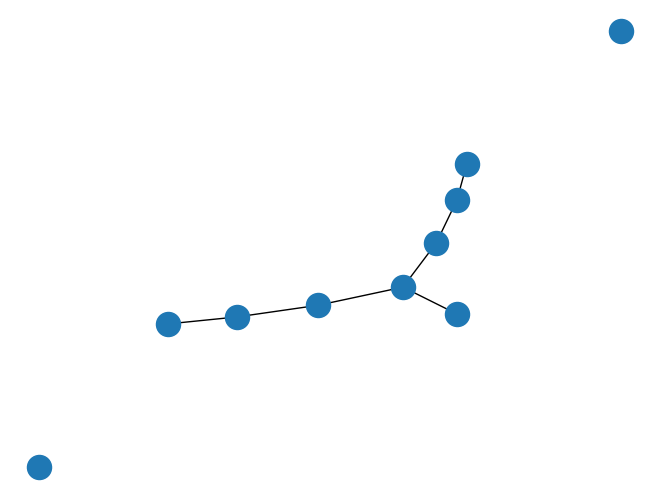

In [333]:
network = Network(vertices, edges, directed = False, e_weighted=False ,v_weighted=False)
x = network
x

In [334]:
for i in x.vertices:
    print(network.maximal_subnetwork(i))

Network

Vertices: ([vertex(-0.30, -0.12), vertex(-1.22, 0.81), vertex(0.78, -0.71), vertex(0.24, 2.36)])

Edges: ([edge((-0.30, -0.12)--(0.24, 2.36)), edge((0.24, 2.36)--(0.78, -0.71)), edge((0.78, -0.71)--(-1.22, 0.81))])
Network

Vertices: ([vertex(0.78, -0.71), vertex(-1.22, 0.81), vertex(0.24, 2.36)])

Edges: ([edge((0.24, 2.36)--(0.78, -0.71)), edge((0.78, -0.71)--(-1.22, 0.81))])
Network

Vertices: ([vertex(-1.22, 0.81)])

Edges: ([])
Network

Vertices: ([vertex(1.10, 0.64)])

Edges: ([])
Network

Vertices: ([vertex(-1.26, 0.22), vertex(-1.22, 0.81), vertex(-0.93, -1.10), vertex(-1.70, 1.52)])

Edges: ([edge((-0.93, -1.10)--(-1.22, 0.81)), edge((-0.93, -1.10)--(-1.70, 1.52)), edge((-1.70, 1.52)--(-1.26, 0.22))])
Network

Vertices: ([vertex(0.14, -0.38)])

Edges: ([])
Network

Vertices: ([vertex(-1.26, 0.22), vertex(-1.70, 1.52)])

Edges: ([edge((-1.70, 1.52)--(-1.26, 0.22))])
Network

Vertices: ([vertex(2.43, 0.62), vertex(-1.22, 0.81)])

Edges: ([edge((2.43, 0.62)--(-1.22, 0.81

~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.Network.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°  Vertices  °°°°°°°°°°°°°°°°°°°°°°°°°°°°°

(-0.34, 1.69)
(-0.88, -1.76)
(0.02, 2.01)
(0.48, -0.52)
(0.71, 0.69)
(-1.17, -0.06)
(1.76, 0.35)
(-0.18, 1.09)
(0.37, 0.25)
(0.33, 1.20)


-->--->--->--->--->--->--->--->  Edges  <---<---<---<---<---<---<---<-

edge((-0.88, -1.76)--(-0.34, 1.69))
edge((0.02, 2.01)--(-0.34, 1.69))
edge((0.71, 0.69)--(-0.88, -1.76))
edge((-1.17, -0.06)--(-0.18, 1.09))
edge((-1.17, -0.06)--(0.37, 0.25))
edge((0.37, 0.25)--(-0.18, 1.09))
edge((0.37, 0.25)--(-1.17, -0.06))

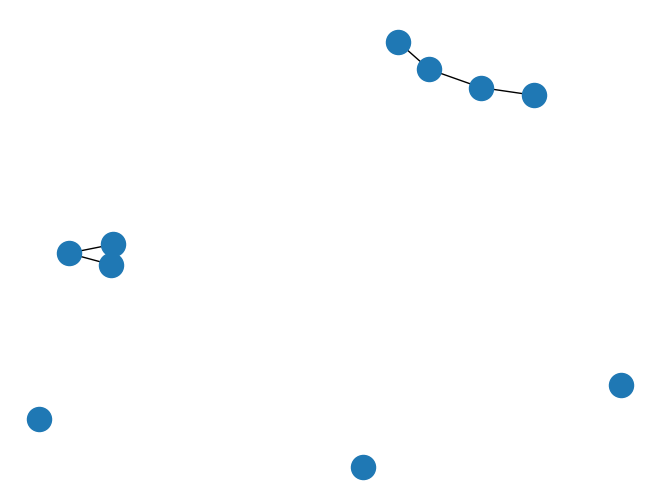

In [330]:
network

In [11]:
network = Network(vertices=list({Vertex(1,0) , Vertex(0,1), Vertex(1,1), Vertex(0,0)}), edges=list({Edge(Vertex(1,0), Vertex(0,1)), Edge(Vertex(1,0), Vertex(1,1)), Edge(Vertex(0,1), Vertex(1,1)), Edge(Vertex(0,1), Vertex(0,0)), Edge(Vertex(1,1), Vertex(0,0))}))

In [12]:
network.nontrivial_path(Vertex(1,0), Vertex(0,0))

(1.0, 0.0) -> (1.0, 1.0) -> (0.0, 0.0)

In [13]:
print(network.path_component(Vertex(1,0)))

{vertex(0.0, 1.0), vertex(1.0, 0.0), vertex(1.0, 1.0), vertex(0.0, 0.0)}


In [272]:
network2 = Network(vertices = list({Vertex(2,2), Vertex(3,2), Vertex(2,3), Vertex(3,3)}), edges = list({Edge(Vertex(2,2), Vertex(3,2)), Edge(Vertex(2,2), Vertex(2,3)), Edge(Vertex(3,2), Vertex(3,3)), Edge(Vertex(2,3), Vertex(3,3))}))

In [273]:
network2.vertices

[vertex(2.00, 3.00),
 vertex(3.00, 2.00),
 vertex(3.00, 3.00),
 vertex(2.00, 2.00)]

In [274]:
network2.edges

[edge((3.00, 2.00)--(3.00, 3.00)),
 edge((2.00, 2.00)--(3.00, 2.00)),
 edge((2.00, 3.00)--(3.00, 3.00)),
 edge((2.00, 2.00)--(2.00, 3.00))]

In [17]:
network3 = network + network2

In [18]:
network3.path_component(Vertex(1,0))

{vertex(0.0, 0.0), vertex(0.0, 1.0), vertex(1.0, 0.0), vertex(1.0, 1.0)}

In [ ]:
for i in network3.path_component(Vertex(1,0)):
    print(i)

[vertex(0.0, 1.0), vertex(1.0, 1.0)]
(0.0, 1.0)
(1.0, 0.0)
(1.0, 1.0)
(0.0, 0.0)


In [ ]:
network3.path_component(Vertex(1,0))

[vertex(0.0, 1.0), vertex(1.0, 1.0)]


{vertex(0.0, 0.0), vertex(0.0, 1.0), vertex(1.0, 0.0), vertex(1.0, 1.0)}

In [ ]:
G = nx.Graph()
G.add_nodes_from(network4.vertices)
G.add_edges_from(list(map(lambda x: x.tuple, network4.edges)))

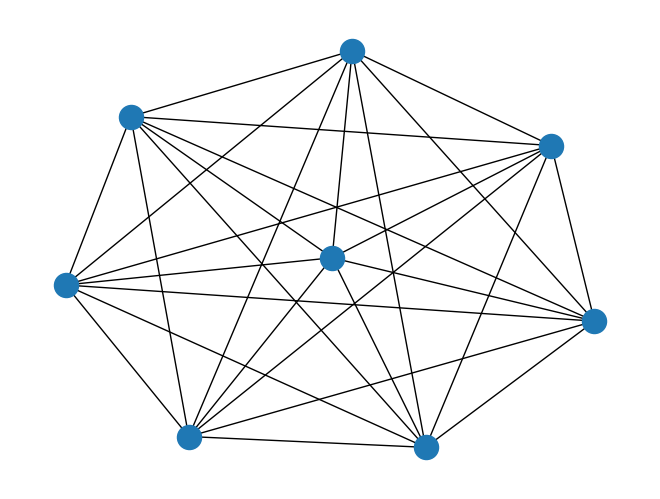

In [ ]:
nx.draw(G)

In [294]:
a = {1,2,3}
b = a.pop()
a, b

({2, 3}, 1)

In [323]:
network2 = Network(vertices = list({Vertex(2,2), Vertex(3,2), Vertex(2,3), Vertex(3,3)}), edges = list({Edge(Vertex(2,2), Vertex(3,2)), Edge(Vertex(2,2), Vertex(2,3)), Edge(Vertex(3,2), Vertex(3,3)), Edge(Vertex(2,3), Vertex(3,3))}))
Edge(Vertex(2,2), Vertex(1,2)) in network2

False

In [324]:
network2.adjacent_vertices(Vertex(2,2))

[vertex(3.00, 2.00), vertex(2.00, 3.00)]

In [325]:
nt = network2.remove_all_edges()

In [326]:
network2.add_edge(Edge(Vertex(2,2), Vertex(1,2)))

~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.Network.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°  Vertices  °°°°°°°°°°°°°°°°°°°°°°°°°°°°°

(1.00, 2.00)
(2.00, 3.00)
(3.00, 3.00)
(2.00, 2.00)
(3.00, 2.00)


-->--->--->--->--->--->--->--->  Edges  <---<---<---<---<---<---<---<-

edge((3.00, 2.00)--(3.00, 3.00))
edge((2.00, 2.00)--(3.00, 2.00))
edge((2.00, 3.00)--(3.00, 3.00))
edge((2.00, 2.00)--(2.00, 3.00))
edge((2.00, 2.00)--(1.00, 2.00))

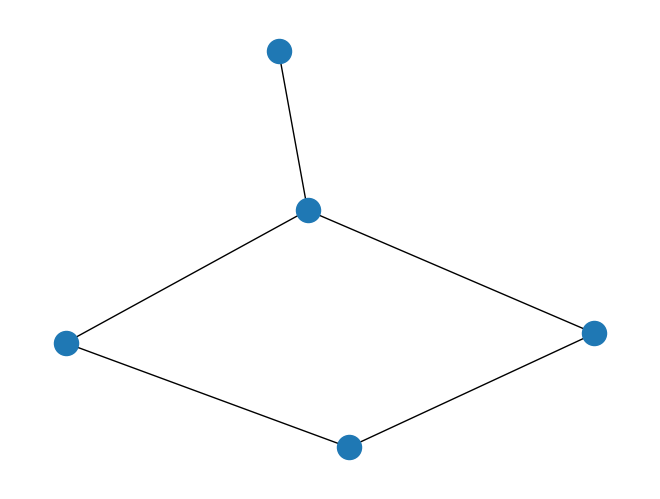

In [327]:
network2.maximal_subnetwork(Vertex(2,2))

In [328]:
x = {Edge(Vertex(2,2), Vertex(1,2)), Edge(Vertex(1,2), Vertex(2,2))}

In [329]:
x

{edge((1.00, 2.00)--(2.00, 2.00)), edge((2.00, 2.00)--(1.00, 2.00))}